In [15]:
from random import randint
import os
import matplotlib.pyplot as plt
import numpy as np

#Ship Class
class Ship:
  def __init__(self, size, orientation, location):
    self.size = size
    
    if orientation == 'horizontal' or orientation == 'vertical':
      self.orientation = orientation
    else:
      raise ValueError("Value must be 'horizontal' or 'vertical'.")
    
    if orientation == 'horizontal':
      if location['row'] in range(row_size):
        self.coordinates = []
        for index in range(size):
          if location['col'] + index in range(col_size):
            self.coordinates.append({'row': location['row'], 'col': location['col'] + index})
          else:
            raise IndexError("Column is out of range.")
      else:
        raise IndexError("Row is out of range.")
    elif orientation == 'vertical':
      if location['col'] in range(col_size):
        self.coordinates = []
        for index in range(size):
          if location['row'] + index in range(row_size):
            self.coordinates.append({'row': location['row'] + index, 'col': location['col']})
          else:
            raise IndexError("Row is out of range.")
      else:
        raise IndexError("Column is out of range.")

    if self.filled():
      print_board(board)
      print(" ".join(str(coords) for coords in self.coordinates))
      raise IndexError("A ship already occupies that space.")
    else:
      self.fillBoard()
  
  def filled(self):
    for coords in self.coordinates:
      if board[coords['row']][coords['col']] == 1:
        return True
    return False
  
  def fillBoard(self):
    for coords in self.coordinates:
      board[coords['row']][coords['col']] = 1

  def contains(self, location):
    for coords in self.coordinates:
      if coords == location:
        return True
    return False
  
  def destroyed(self):
    for coords in self.coordinates:
      if board_display[coords['row']][coords['col']] == 'O':
        return False
      elif board_display[coords['row']][coords['col']] == '*':
        raise RuntimeError("Board display inaccurate")
    return True

  
#Settings Variables
row_size = 9 #number of rows
col_size = 9 #number of columns
num_ships = 4
max_ship_size = 4
min_ship_size = 2
num_turns = 2

#Create lists
ship_list = []

board = [[0] * col_size for x in range(row_size)]

board_display = [["O"] * col_size for x in range(row_size)]

#Functions
def print_board(board_array):
  print("\n  " + " ".join(str(x) for x in range(1, col_size + 1)))
  for r in range(row_size):
    print(str(r + 1) + " " + " ".join(str(c) for c in board_array[r]))
  print()

def search_locations(size, orientation):
  locations = []

  if orientation != 'horizontal' and orientation != 'vertical':
    raise ValueError("Orientation must have a value of either 'horizontal' or 'vertical'.")

  if orientation == 'horizontal':
    if size <= col_size:
      for r in range(row_size):
        for c in range(col_size - size + 1):
          if 1 not in board[r][c:c+size]:
            locations.append({'row': r, 'col': c})
  elif orientation == 'vertical':
    if size <= row_size:
      for c in range(col_size):
        for r in range(row_size - size + 1):
          if 1 not in [board[i][c] for i in range(r, r+size)]:
            locations.append({'row': r, 'col': c})

  if not locations:
    return 'None'
  else:
    return locations

def random_location():
  size = randint(min_ship_size, max_ship_size)
  orientation = 'horizontal' if randint(0, 1) == 0 else 'vertical'

  locations = search_locations(size, orientation)
  if locations == 'None':
    return 'None'
  else:
    return {'location': locations[randint(0, len(locations) - 1)], 'size': size,\
     'orientation': orientation}

def get_row():
  while True:
    try:
      guess = int(input("Row Guess: "))
      if guess in range(1, row_size + 1):
        return guess - 1
      else:
        print("\nOops, that's not even in the ocean.")
    except ValueError:
      print("\nPlease enter a number")

def get_col():
  while True:
    try:
      guess = int(input("Column Guess: "))
      if guess in range(1, col_size + 1):
        return guess - 1
      else:
        print("\nOops, that's not even in the ocean.")
    except ValueError:
      print("\nPlease enter a number")

# Create the ships
temp = 0
while temp < num_ships:
  ship_info = random_location()
  if ship_info == 'None':
    continue
  else:
    ship_list.append(Ship(ship_info['size'], ship_info['orientation'], ship_info['location']))
    temp += 1
del temp



C:\Users\mahka\AppData\Local\Temp\ipykernel_32672\4090198971.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base      = plt.cm.get_cmap('Set3', len(ships) + 1)   # original Set3 palette


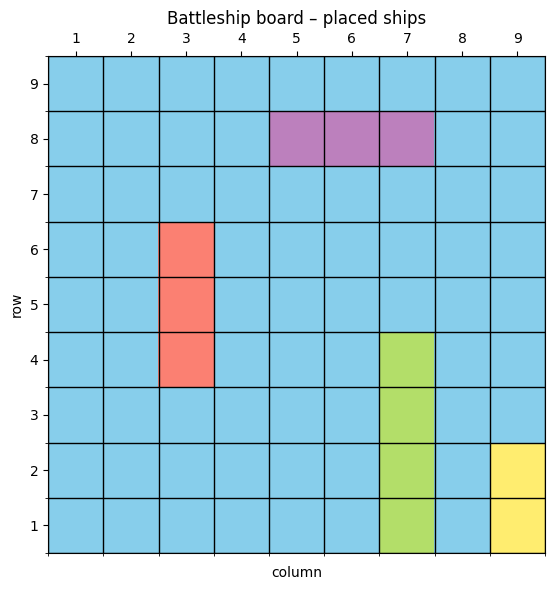

In [11]:
# ---------------- Visual helper (append after the ship-creation loop) ---------
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def draw_board(board, ships):
  """
  Show the current board with the ships that were placed.
  Each ship gets its own colour, water stays white.
  """
  # 1 = ship, 0 = water in original board.
  # Here we give each ship a unique integer so the colormap can separate them.
  grid = np.zeros_like(board, dtype=int)

  for ship_idx, sh in enumerate(ships, start=1):
    for coord in sh.coordinates:
      r, c = coord['row'], coord['col']
      grid[r, c] = ship_idx

  # --- Plot ---------------------------------------------------------------
  fig, ax = plt.subplots(figsize=(6, 6))
  # cmap = plt.get_cmap('Set3', len(ships) + 1)  # pastel colours
  base      = plt.cm.get_cmap('Set3', len(ships) + 1)   # original Set3 palette
  colourlist = ['#87CEEB'] + [base(i) for i in range(1, base.N)]

  cmap = ListedColormap(colourlist)

  im = ax.imshow(grid, cmap=cmap, vmin=0, vmax=len(ships))

  # Draw grid lines
  ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
  ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
  ax.grid(which='minor', color='black', linewidth=1)

  # Show row / column numbers starting at 1
  ax.set_xticks(np.arange(grid.shape[1]))
  ax.set_yticks(np.arange(grid.shape[0]))
  ax.set_xticklabels(np.arange(1, grid.shape[1] + 1))
  ax.set_yticklabels(np.arange(1, grid.shape[0] + 1))
  ax.tick_params(top=True, bottom=False,
                 labeltop=True, labelbottom=False)  # numbers on top
  ax.set_xlabel('column')
  ax.set_ylabel('row')
  ax.invert_yaxis()  # put row 1 at the top like the printed board

  # Optional colour-bar (comments show how to hide it if you prefer)
  # cb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04,
  #                   ticks=np.arange(len(ships) + 1))
  # cb.ax.set_ylabel('ship #')

  plt.title('Battleship board – placed ships')
  plt.tight_layout()
  plt.show()


# ---------------- Call the visual once all ships are placed ------------------
draw_board(np.array(board), ship_list)


In [ ]:
import tkinter as tk
from random import randint

# ------------------------------------------------------------------------
# 1. copy your Ship class *exactly* as you posted it (no change required)
# ------------------------------------------------------------------------
#   …  Ship class here  …

# ------------------------------------------------------------------------
# 2. constants from your script
# ------------------------------------------------------------------------
row_size = 9
col_size = 9
num_ships = 4
max_ship_size = 4
min_ship_size = 2

CELL = 32                     # pixel size for every square in the GUI

# ------------------------------------------------------------------------
# 3. utility: search_locations / random_location from your code (unchanged)
# ------------------------------------------------------------------------
#   …  search_locations()  …
#   …  random_location()   …

# ------------------------------------------------------------------------
# 4. build a random fleet on an *independent* board
# ------------------------------------------------------------------------
def build_fleet():
  global board, board_display        # reuse Ship code unchanged

  board         = [[0]*col_size for _ in range(row_size)]
  board_display = [["O"]*col_size for _ in range(row_size)]
  ships         = []
  placed = 0
  while placed < num_ships:
    info = random_location()
    if info == 'None':
      continue
    ships.append(Ship(info['size'], info['orientation'], info['location']))
    placed += 1
  return {'board': board,
          'display': board_display,
          'ships': ships,
          'view': [["O"]*col_size for _ in range(row_size)]}

p1 = build_fleet()
p2 = build_fleet()
players = [p1, p2]
current = 0                              # whose turn (0 = P1, 1 = P2)

# ------------------------------------------------------------------------
# 5. GUI helpers
# ------------------------------------------------------------------------
def draw_grid(canvas, board, palette):
  canvas.delete("all")
  for r in range(row_size):
    for c in range(col_size):
      x0, y0 = c*CELL, r*CELL
      x1, y1 = x0+CELL, y0+CELL
      state = board[r][c]
      canvas.create_rectangle(x0, y0, x1, y1,
                              fill=palette[state], outline="black")

def fire(defender, r, c):
  """resolve one shot; True if game over"""
  if defender['display'][r][c] in ('X', '*'):     # repeat – ignore
    return False

  for s in defender['ships']:
    if s.contains({'row': r, 'col': c}):
      defender['display'][r][c] = 'X'
      if s.destroyed():
        defender['ships'].remove(s)
      return len(defender['ships']) == 0

  defender['display'][r][c] = '*'
  return len(defender['ships']) == 0

# colour keys for the two grids
own_palette   = {0:"#d0e7ff", 1:"#4f9cff", 'X':"#ff4d4d", '*':"#ffffff"}
view_palette  = {'O':"#808080", 'X':"#ff4d4d", '*':"#ffffff"}

# ------------------------------------------------------------------------
# 6. build the two windows
# ------------------------------------------------------------------------
root = tk.Tk(); root.withdraw()          # hide the implicit root

windows = []
for i, pl in enumerate(players, start=1):
  win = tk.Toplevel()
  win.title(f"Player {i}")
  tk.Label(win, text="your fleet").grid(row=0, column=0, padx=10)
  tk.Label(win, text="your shots").grid(row=0, column=1, padx=10)

  own  = tk.Canvas(win, width=col_size*CELL, height=row_size*CELL)
  view = tk.Canvas(win, width=col_size*CELL, height=row_size*CELL)
  own.grid(row=1, column=0); view.grid(row=1, column=1, padx=5)

  pl['own_canvas']  = own
  pl['view_canvas'] = view
  windows.append(win)

  # first draw
  draw_grid(own , pl['board'] , own_palette )
  draw_grid(view, pl['view']  , view_palette)

# ------------------------------------------------------------------------
# 7. click handler – attached only to the *current* player’s view grid
# ------------------------------------------------------------------------
def click(event):
  global current
  atk = players[current]
  dfn = players[1-current]

  col = event.x // CELL
  row = event.y // CELL
  if not (0 <= row < row_size and 0 <= col < col_size):
    return
  if atk['view'][row][col] in ('X', '*'):
    return   # already tried

  game_over = fire(dfn, row, col)
  atk['view'][row][col] = dfn['display'][row][col]

  # redraw the two canvases affected
  draw_grid(atk['view_canvas'], atk['view'], view_palette)
  draw_grid(dfn['own_canvas'],  dfn['display'], own_palette)

  if game_over:
    tk.messagebox.showinfo("Game over", f"Player {current+1} wins!")
    for w in windows: w.destroy()
    return

  # switch turn
  atk['view_canvas'].unbind("<Button-1>")
  current = 1-current
  players[current]['view_canvas'].bind("<Button-1>", click)
  tk.messagebox.showinfo("Turn switch", f"Player {current+1}'s move!")

# activate first player
players[0]['view_canvas'].bind("<Button-1>", click)

# ------------------------------------------------------------------------
# 8. start event loop
# ------------------------------------------------------------------------
root.mainloop()


In [16]:
# ─────────────────────────────────────────────────────────────────────────────
#  A  D D   T H I S   B L O C K   T O   Y O U R   S C R I P T
# ─────────────────────────────────────────────────────────────────────────────

# --------------------------------------------------------------------------
# 1) build one fleet on its own private board / display
# --------------------------------------------------------------------------
def build_random_fleet(player_name):
  """
  returns a dict with:
      board         – 0/1 occupancy grid
      display       – 'O'/'X'/'*' public view (what the attacker sees)
      ships         – list of Ship objects
      view          – attacker’s personal guess board versus this fleet
  """
  global board, board_display          # we momentarily redirect these
  original_board, original_display = board, board_display

  board         = [[0] * col_size for _ in range(row_size)]
  board_display = [["O"] * col_size for _ in range(row_size)]
  ships         = []
  placed        = 0
  while placed < num_ships:            # use your own random placement logic
    info = random_location()
    if info == 'None':
      continue
    ships.append(Ship(info['size'],
                      info['orientation'],
                      info['location']))
    placed += 1

  fleet = {
    'name'   : player_name,
    'board'  : board,                # private occupancy
    'display': board_display,        # shows hits / misses
    'ships'  : ships,
    'view'   : [["O"] * col_size for _ in range(row_size)]  # what I know about enemy
  }

  # restore globals for next caller
  board, board_display = original_board, original_display
  return fleet


# build both players’ fleets
p1 = build_random_fleet("Player 1")
p2 = build_random_fleet("Player 2")
players = [p1, p2]

# --------------------------------------------------------------------------
# 2) helper: resolve one shot
# --------------------------------------------------------------------------
def fire_at(defender, r, c):
  """
  Updates defender['display'] **and** returns a status string.
  Uses defender['ships'] for hit / destroy checks.
  """
  global board_display                 # Ship.destroyed() relies on it
  display_backup = board_display
  board_display  = defender['display']

  if defender['display'][r][c] in ('X', '*'):
    board_display = display_backup
    return 'repeat'

  for ship in defender['ships']:
    if ship.contains({'row': r, 'col': c}):
      defender['display'][r][c] = 'X'
      status = 'hit'
      if ship.destroyed():
        defender['ships'].remove(ship)
        status = 'destroyed'
      board_display = display_backup
      return status

  defender['display'][r][c] = '*'
  board_display = display_backup
  return 'miss'


# --------------------------------------------------------------------------
# 3) main loop – alternate who shoots first every round
# --------------------------------------------------------------------------
turn = 0
while p1['ships'] and p2['ships']:
  starter = turn % 2                      # 0 → P1 starts, 1 → P2 starts
  order   = (starter, 1 - starter)        # who shoots first/second this round

  for idx in order:
    atk = players[idx]
    dfn = players[1 - idx]

    print(f"\n{atk['name']}, it’s your turn to fire at {dfn['name']}!")
    print_board(atk['view'])

    # ask until a fresh square is chosen
    while True:
      row = get_row()
      col = get_col()
      if atk['view'][row][col] in ('X', '*'):
        print("You tried that square already – pick again.\n")
      else:
        break

    outcome = fire_at(dfn, row, col)
    atk['view'][row][col] = 'X' if outcome in ('hit', 'destroyed') else '*'

    # feedback for *both* players to see
    print(f"\n{atk['name']} fires at ({row+1},{col+1}) → {outcome.upper()}")
    print(f"{atk['name']}'s view of {dfn['name']}:")
    print_board(atk['view'])
    print(f"{dfn['name']}'s own board:")
    print_board(dfn['display'])

    if not dfn['ships']:
      break   # defender lost

  turn += 1

# --------------------------------------------------------------------------
# 4) result
# --------------------------------------------------------------------------
winner = p1['name'] if p2['ships'] == [] else p2['name']
print(f"\n*** {winner} wins! ***")



Player 1, it’s your turn to fire at Player 2!

  1 2 3 4 5 6 7 8 9
1 O O O O O O O O O
2 O O O O O O O O O
3 O O O O O O O O O
4 O O O O O O O O O
5 O O O O O O O O O
6 O O O O O O O O O
7 O O O O O O O O O
8 O O O O O O O O O
9 O O O O O O O O O


Player 1 fires at (5,8) → MISS
Player 1's view of Player 2:

  1 2 3 4 5 6 7 8 9
1 O O O O O O O O O
2 O O O O O O O O O
3 O O O O O O O O O
4 O O O O O O O O O
5 O O O O O O O * O
6 O O O O O O O O O
7 O O O O O O O O O
8 O O O O O O O O O
9 O O O O O O O O O

Player 2's own board:

  1 2 3 4 5 6 7 8 9
1 O O O O O O O O O
2 O O O O O O O O O
3 O O O O O O O O O
4 O O O O O O O O O
5 O O O O O O O * O
6 O O O O O O O O O
7 O O O O O O O O O
8 O O O O O O O O O
9 O O O O O O O O O


Player 2, it’s your turn to fire at Player 1!

  1 2 3 4 5 6 7 8 9
1 O O O O O O O O O
2 O O O O O O O O O
3 O O O O O O O O O
4 O O O O O O O O O
5 O O O O O O O O O
6 O O O O O O O O O
7 O O O O O O O O O
8 O O O O O O O O O
9 O O O O O O O O O


Player 2 fires

KeyboardInterrupt: Interrupted by user

In [14]:
import os

# ── helpers ──────────────────────────────────────────────────────────────────
def blank_board(rows, cols):
  return [[' ' for _ in range(cols)] for _ in range(rows)]

def print_board(b):
  for r in b:
    print(' '.join(r))
  print()

def fire(board_display, ship_list, row, col):
  """one shot – same as previous message, shortened a bit."""
  if board_display[row][col] in ('X', '*'):
    return 'repeat'

  for ship in ship_list:
    if ship.contains({'row': row, 'col': col}):
      board_display[row][col] = 'X'
      if ship.destroyed():
        ship_list.remove(ship)
        return 'destroyed'
      return 'hit'

  board_display[row][col] = '*'
  return 'miss'

# ── HOW EACH PLAYER CHOOSES A SQUARE ────────────────────────────────────────
# Replace these two functions with whatever you like:
#   • ask the user with input()
#   • pop from a pre-defined list of test moves
#   • call an AI routine
def next_shot_p1():
  row = int(input("P1 row : "))
  col = int(input("P1 col : "))
  return row, col

def next_shot_p2():
  row = int(input("P2 row : "))
  col = int(input("P2 col : "))
  return row, col

# ── GAME SET-UP (example 5×5 boards) ─────────────────────────────────────────
ROWS, COLS = 5, 5
board_p1, board_p2 = blank_board(ROWS, COLS), blank_board(ROWS, COLS)
view_p1 , view_p2  = blank_board(ROWS, COLS), blank_board(ROWS, COLS)

# ship_list_p1 / ship_list_p2 must be lists of your Ship objects
# with .contains() and .destroyed() methods implemented.
ship_list_p1 = [...]   # ≤-- fill
ship_list_p2 = [...]   # ≤-- fill

round_no = 0
while ship_list_p1 and ship_list_p2:               # stop when one fleet is gone
  os.system('clear')
  print(f"=== ROUND {round_no + 1} ===\n")
  starters = (0, 1) if round_no % 2 == 0 else (1, 0)   # alternate first shooter
  players = [
    {
      'name'      : 'Player 1',
      'shoot'     : next_shot_p1,
      'ships'     : ship_list_p1,
      'enemy_b'   : board_p2,
      'my_view'   : view_p1
    },
    {
      'name'      : 'Player 2',
      'shoot'     : next_shot_p2,
      'ships'     : ship_list_p2,
      'enemy_b'   : board_p1,
      'my_view'   : view_p2
    }
  ]

  for idx in starters:                           # two turns per round
    atk   = players[idx]
    defn  = players[1 - idx]

    # --- choose square ---------------------------------------------------
    while True:
      r, c = atk['shoot']()
      if atk['my_view'][r][c] in ('X', '*'):
        print("You tried that square already – pick again.")
      else:
        break

    # --- resolve shot ----------------------------------------------------
    result = fire(defn['enemy_b'], defn['ships'], r, c)
    atk['my_view'][r][c] = 'X' if result in ('hit', 'destroyed') else '*'

    # --- feedback --------------------------------------------------------
    print(f"\n{atk['name']} fires at ({r},{c}) → {result.upper()}")
    print(f"{atk['name']}'s view of opponent:")
    print_board(atk['my_view'])

    # show defender their own board so they see the damage
    print(f"{defn['name']}'s own board:")
    print_board(defn['enemy_b'])

    if not defn['ships']:                      # fleet sunk – game over
      break

  round_no += 1

# ── end-game message ─────────────────────────────────────────────────────────
winner = "Player 1" if ship_list_p2 == [] else "Player 2"
print(f"*** {winner} wins! ***")


=== ROUND 1 ===



AttributeError: 'ellipsis' object has no attribute 'contains'

In [ ]:
# Play Game
os.system('clear')
print_board(board_display)

for turn in range(num_turns):
  print("Turn:", turn + 1, "of", num_turns)
  print("Ships left:", len(ship_list))
  print()

  guess_coords = {}
  while True:
    guess_coords['row'] = get_row()
    guess_coords['col'] = get_col()
    if board_display[guess_coords['row']][guess_coords['col']] == 'X' or \
            board_display[guess_coords['row']][guess_coords['col']] == '*':
      print("\nYou guessed that one already.")
    else:
      break

  os.system('clear')

  ship_hit = False
  for ship in ship_list:
    if ship.contains(guess_coords):
      print("Hit!")
      ship_hit = True
      board_display[guess_coords['row']][guess_coords['col']] = 'X'
      if ship.destroyed():
        print("Ship Destroyed!")
        ship_list.remove(ship)
      break
  if not ship_hit:
    board_display[guess_coords['row']][guess_coords['col']] = '*'
    print("You missed!")

  print_board(board_display)

  if not ship_list:
    break

# End Game
if ship_list:
  print("You lose!")
else:
  print("All the ships are sunk. You win!")

In [12]:
# ---------------- Visual helpers --------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def init_visual(rows, cols):
  """
  Create an empty sky-blue board and return (fig, ax).
  """
  plt.ion()                                   # interactive mode ON
  fig, ax = plt.subplots(figsize=(6, 6))

  # one colour only → bright sky blue  (#87CEEB)
  cmap = ListedColormap(['#87CEEB'])
  im   = ax.imshow(np.zeros((rows, cols)), cmap=cmap, vmin=0, vmax=0)

  # grid lines
  ax.set_xticks(np.arange(-.5, cols, 1), minor=True)
  ax.set_yticks(np.arange(-.5, rows, 1), minor=True)
  ax.grid(which='minor', color='black', linewidth=1)

  # row/col numbers
  ax.set_xticks(np.arange(cols))
  ax.set_yticks(np.arange(rows))
  ax.set_xticklabels(np.arange(1, cols+1))
  ax.set_yticklabels(np.arange(1, rows+1))
  ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
  ax.set_xlabel('column')
  ax.set_ylabel('row')
  ax.invert_yaxis()

  plt.title('Battleship – live view')
  plt.tight_layout()
  return fig, ax


def mark_guess(ax, r, c, hit):
  """
  Place a red X for a hit, a white dot for a miss.
  """
  if hit:
    ax.text(c, r, 'X', ha='center', va='center',
            color='red', fontsize=16, fontweight='bold')
  else:
    ax.text(c, r, '•', ha='center', va='center',
            color='white', fontsize=14)
  plt.pause(0.01)          # let the GUI refresh


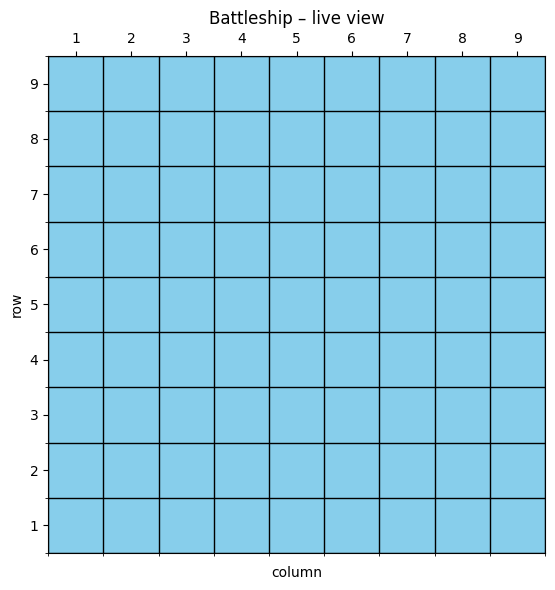

In [13]:
rows, cols = len(board_display), len(board_display[0])
fig, ax = init_visual(rows, cols)


In [14]:
mark_guess(ax,
           guess_coords['row'],
           guess_coords['col'],
           hit=ship_hit)


KeyError: 'row'